In [2]:
import pandas as pd
import twint
from pytrends.request import TrendReq
pytrends = TrendReq(backoff_factor=0.5)
%run -i 'mod5_functions.py'
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', None)
import seaborn as sns
import numpy as np
from statsmodels.tsa.stattools import adfuller
sns.set(style="darkgrid", font='Verdana', color_codes=True)
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import math
from statsmodels.tsa.stattools import adfuller
from pmdarima.arima import auto_arima
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX

---

In [33]:
# Using a custom function to utilize pytrends to get me the interest index
## From Google Trends Pseudo-API over a specified period of time
### Timeframe format --> 'YYYY-MM-DD YYYY-MM-DD' --> 'early recent'
# This one got '2000-01-01 current_date'
# indoor_farming = get_int('indoor farming', '2000-01-01 2020-05-16')
# Saving this data
# indoor_farming_int.to_csv('indoor_farming_interest')

# Saved the csv before
indoor_farming = pd.read_csv('indoor_farming_interest')
indoor_farming['date'] = pd.to_datetime(indoor_farming['date'])
indoor_farming.set_index('date', inplace=True)

Going to build a `pytrends` payload for the term **indoor farming** and return some of the related topics.

In [34]:
pytrends.build_payload(['indoor farming'], geo='US')

In [35]:
pytrends.related_topics()

{'indoor farming': {'rising':     value formattedValue                                               link  \
  0   99400       Breakout  /trends/explore?q=/g/11c5sr5trf&date=today+5-y...   
  1   83900       Breakout  /trends/explore?q=/m/03fp41&date=today+5-y&geo=US   
  2   77550       Breakout  /trends/explore?q=/m/09y4pm&date=today+5-y&geo=US   
  3   77550       Breakout  /trends/explore?q=/m/0642w22&date=today+5-y&ge...   
  4   77450       Breakout   /trends/explore?q=/m/0fqlj&date=today+5-y&geo=US   
  5   66300       Breakout   /trends/explore?q=/m/09dv7&date=today+5-y&geo=US   
  6   66250       Breakout   /trends/explore?q=/m/03rnh&date=today+5-y&geo=US   
  7   66050       Breakout  /trends/explore?q=/m/015n_w&date=today+5-y&geo=US   
  8   55350       Breakout  /trends/explore?q=/m/04n7m2q&date=today+5-y&ge...   
  9   46650       Breakout    /trends/explore?q=/m/0t8t&date=today+5-y&geo=US   
  10  46400       Breakout  /trends/explore?q=/m/03b848&date=today+5-y&geo=US   


Gathering data on related topics to indoor farming. The goal is to average all of the values together to get a topic wide understanding of the trends.  
  
I will be using the `get_int()` function from before to gather the data, and then save it into a csv for future use.

In [7]:
greenhouse_int = get_int('greenhouse', '2000-01-01 2020-05-16')

In [8]:
greenhouse_int.to_csv('greenhouse.csv')

In [ ]:
greenhouse = pd.read_csv('greenhouse.csv')
greenhouse['date'] = pd.to_datetime(greenhouse['date'])
greenhouse.set_index('date', inplace=True)



In [9]:
hydroponics_int = get_int('hydroponic','2010-01-01 2020-05-16')
hydroponics_int.to_csv('hydroponics.csv')

In [10]:
vfarm_int = get_int('vertical farming', '2010-01-01 2020-05-16')
vfarm_int.to_csv('final_vfarm.csv')

In [11]:
urban_int = get_int('urban agriculture', '2010-01-01 2020-05-16')
urban_int.to_csv('urban_final.csv')

In [12]:
aeroponics_int = get_int('aeroponics', '2010-01-01 2020-05-16')
aeroponics_int.to_csv('aeroponics.csv')

In [59]:
greenhouse_int = pd.read_csv('greenhouse.csv')
greenhouse_int['date'] = pd.to_datetime(greenhouse_int['date'])
greenhouse_int.set_index('date', inplace=True)

vfarm_int = pd.read_csv('final_vfarm.csv')
vfarm_int['date'] = pd.to_datetime(vfarm_int['date'])
vfarm_int.set_index('date', inplace=True)

hydroponics_int = pd.read_csv('hydroponics.csv')
hydroponics_int['date'] = pd.to_datetime(hydroponics_int['date'])
hydroponics_int.set_index('date', inplace=True)

urban_int = pd.read_csv('urban_final.csv')
urban_int['date'] = pd.to_datetime(urban_int['date'])
urban_int.set_index('date', inplace=True)

aeroponics_int = pd.read_csv('aeroponics.csv')
aeroponics_int['date'] = pd.to_datetime(aeroponics_int['date'])
aeroponics_int.set_index('date', inplace=True)

In [60]:
# Going to average these series together to get a whole topic understanding
master = (aeroponics_int['aeroponics']+urban_int['urban agriculture']+vfarm_int['vertical farming']+
          hydroponics_int['hydroponic']+indoor_farming['2010-01-01':'2020-05-16']['indoor farming']+
          greenhouse_int['2010-01-01':'2020-05-16']['greenhouse'])/6

In [61]:
master = master.to_frame()
master = rename_column(master, 0, 'interest')

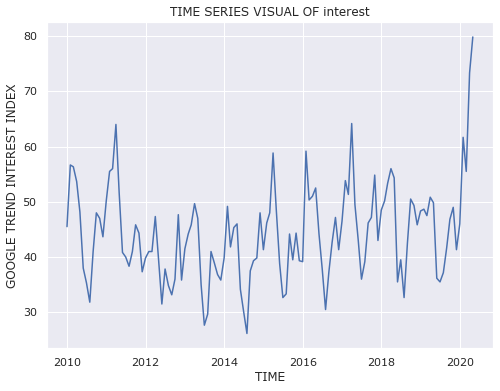

In [62]:
nice_plot(master, 'interest')

In [63]:
# master.to_csv('master_series.csv')

In [64]:
gen_dftest(master, 'interest')

Test Stat                -0.457238
P-Value                   0.900095
# Lags                   12.000000
# Observations          112.000000
Critical Value (1%)      -3.490131
Critical Value (5%)      -2.887712
Critical Value (10%)     -2.580730
dtype: float64

The data that I have compiled, top five related terms to **indoor farming**, is not a stationary time series.

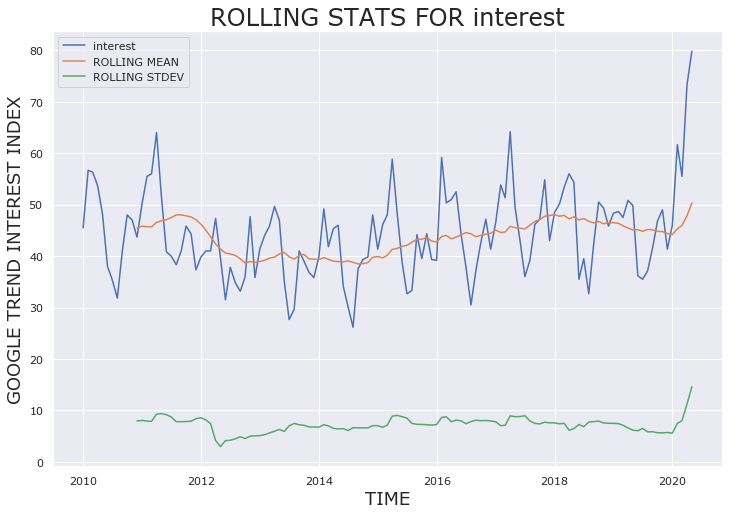

In [65]:
rolling_stats(master, 'interest', 12)

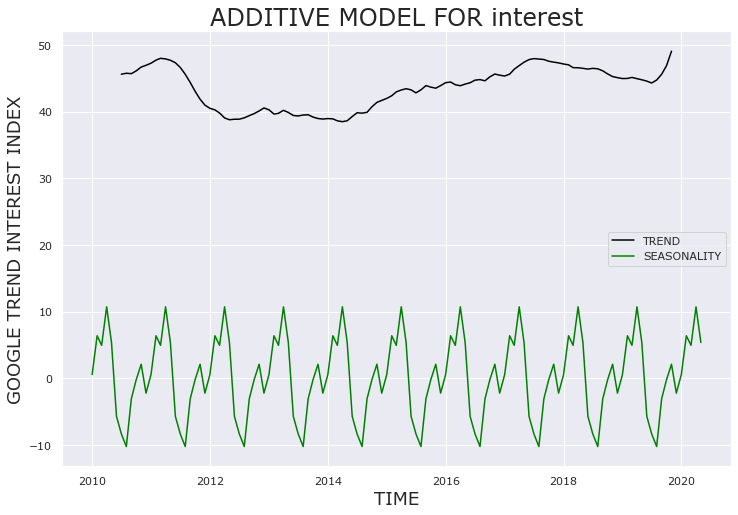

In [66]:
szn_decomp(master, 'interest', model=['additive'],
           graphs=['trend', 'szn'])

Quite a bit of seasonality in this data. Will be taking this into consideration as I converge on a final model.

(<Figure size 1152x216 with 1 Axes>, <Figure size 1152x216 with 1 Axes>)

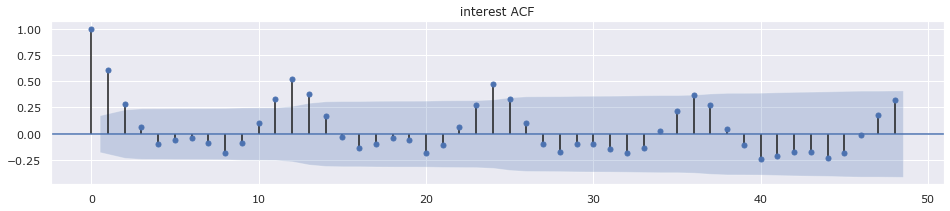

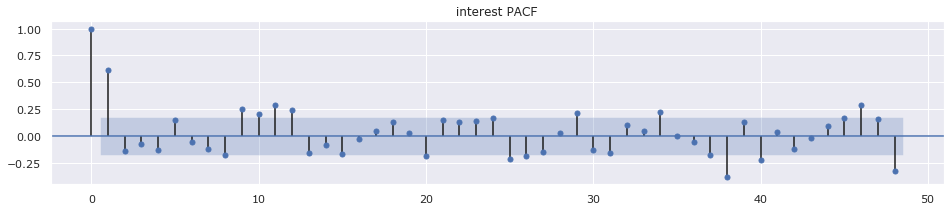

In [67]:
auto_corrs(master, 'interest')

Due to the seasonality of this data, I am going to make a preliminary model with parameters loosely based on the previous EDA.

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarn

                                     SARIMAX Results                                      
Dep. Variable:                           interest   No. Observations:                   72
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 52)   Log Likelihood                 -73.254
Date:                            Mon, 18 May 2020   AIC                            158.507
Time:                                    10:26:57   BIC                            164.174
Sample:                                01-01-2010   HQIC                           159.466
                                     - 12-01-2015                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift          0.0013      0.025      0.054      0.957      -0.048       0.050
ar.L1          0.6605      0.490   

Text(0.5, 1.0, 'SARIMA MODEL')

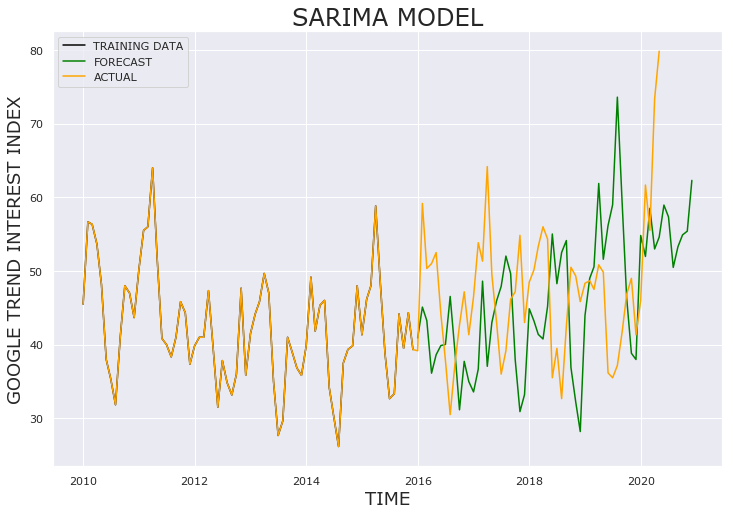

In [68]:
model = SARIMAX(master['2010':'2015'], order=(1,1,1), seasonal_order=(1, 1, 1, 52),
                trend='t')
fit = model.fit()
print(fit.summary())
forecast = fit.forecast(60)
print('Forecasting 60 months into the future from the\ntraining data (2016-2021).\n...\n...')
forecast = pd.DataFrame(forecast)
forecast = rename_column(forecast, 0, 'forecast')
# Plot the nice graphs
fig,ax = plt.subplots(figsize=(12,8))
sns.lineplot(x=master['2010':'2015'].index,
             y=master['2010':'2015']['interest'], color='black')
sns.lineplot(x=forecast.index, y=forecast['forecast'], color='green')
sns.lineplot(x=master['2010':].index,
             y=master['2010':]['interest'], color='orange')
plt.legend(['TRAINING DATA', 'FORECAST', 'ACTUAL'], loc='best')
plt.xlabel('TIME',size=18)
plt.ylabel('GOOGLE TREND INTEREST INDEX', size=18)
plt.title(f'SARIMA MODEL', size=24)

This model's AIC score is:  158.50739170051943
This model's BIC score is:  164.17402557551807
This model's RMSE on test data is:  9.920535120650833


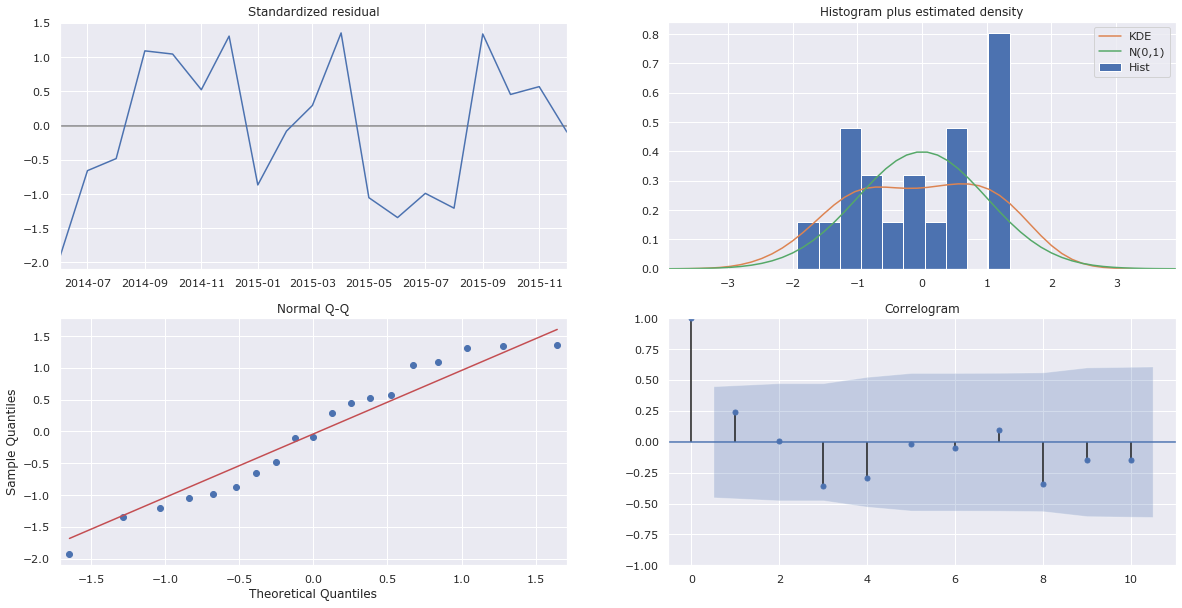

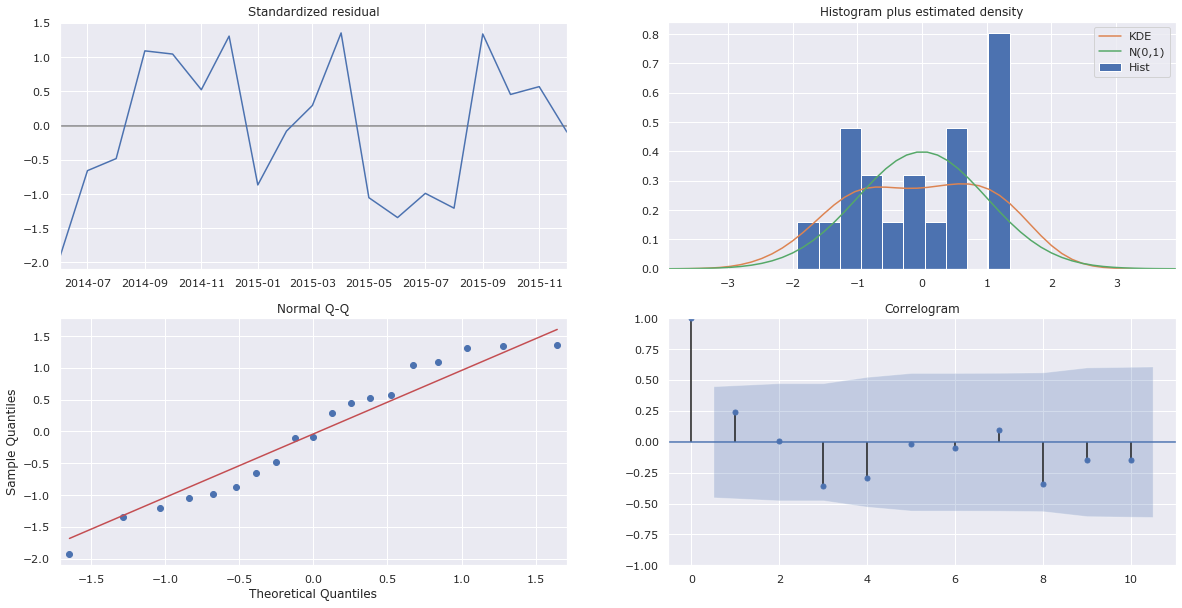

In [69]:
print("This model's AIC score is: ",fit.aic)
print("This model's BIC score is: ",fit.bic)
print("This model's RMSE on test data is: ",np.sqrt(fit.mse))
fit.plot_diagnostics(figsize=(20,10))

Now going to try a model that has no AR, MA, or seasonal components other than differencing.

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                                     SARIMAX Results                                      
Dep. Variable:                           interest   No. Observations:                   72
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 52)   Log Likelihood                 -74.413
Date:                            Mon, 18 May 2020   AIC                            152.826
Time:                                    10:27:01   BIC                            154.715
Sample:                                01-01-2010   HQIC                           153.146
                                     - 12-01-2015                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift          0.0023      0.045      0.051      0.959      -0.087       0.091
sigma2       147.6826     60.800   

Text(0.5, 1.0, 'SARIMA MODEL')

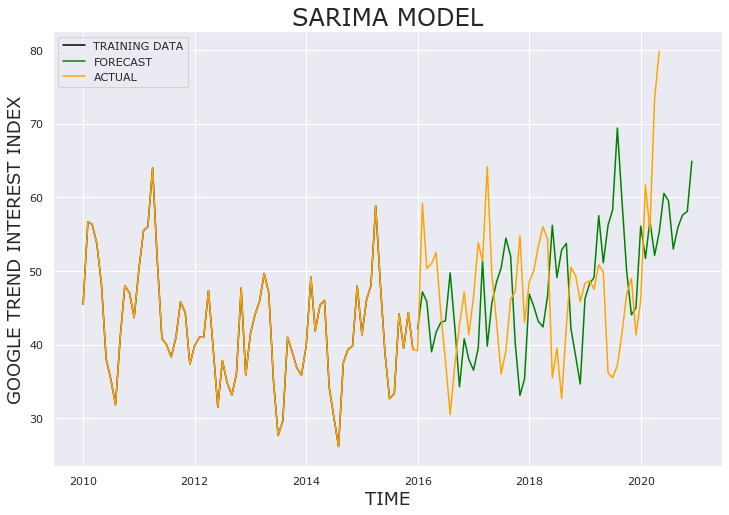

In [70]:
model2 = SARIMAX(master['2010':'2015'], order=(0,1,0), seasonal_order=(0, 1, 0, 52),
                trend='t')
fit = model2.fit()
print(fit.summary())
forecast = fit.forecast(60)
print('Forecasting 60 months into the future from the\ntraining data (2016-2021).\n...\n...')
forecast = pd.DataFrame(forecast)
forecast = rename_column(forecast, 0, 'forecast')
# Plot the nice graphs
fig,ax = plt.subplots(figsize=(12,8))
sns.lineplot(x=master['2010':'2015'].index,
             y=master['2010':'2015']['interest'], color='black')
sns.lineplot(x=forecast.index, y=forecast['forecast'], color='green')
sns.lineplot(x=master['2010':].index,
             y=master['2010':]['interest'], color='orange')
plt.legend(['TRAINING DATA', 'FORECAST', 'ACTUAL'], loc='best')
plt.xlabel('TIME',size=18)
plt.ylabel('GOOGLE TREND INTEREST INDEX', size=18)
plt.title(f'SARIMA MODEL', size=24)

This model's AIC score is:  152.82585306898284
This model's BIC score is:  154.7147310273157
This model's RMSE on test data is:  10.11773472300625


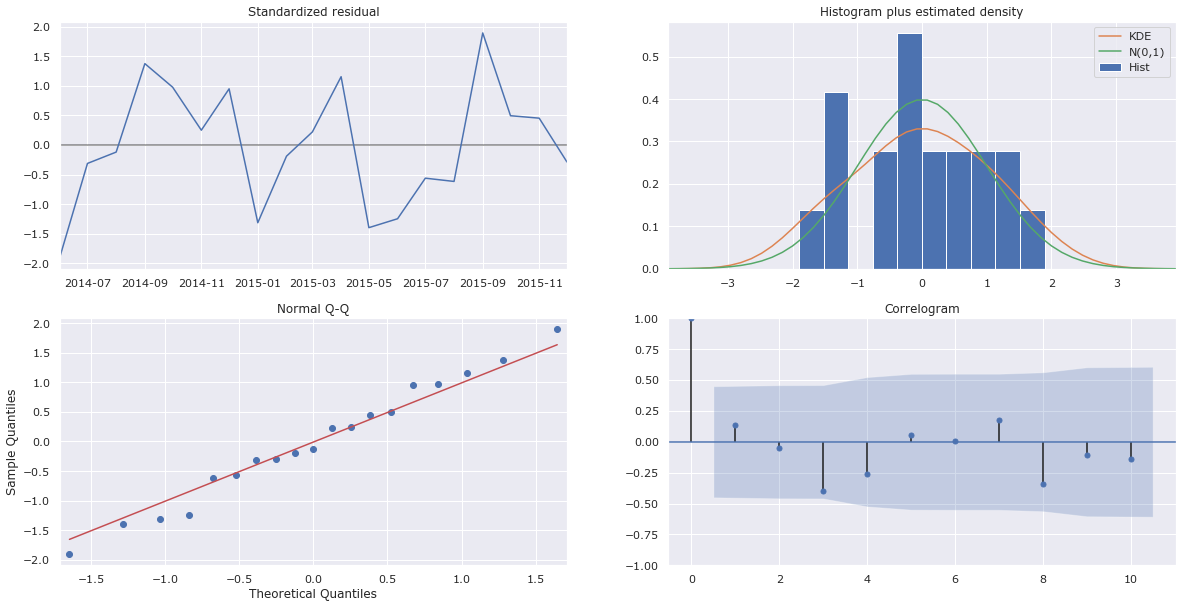

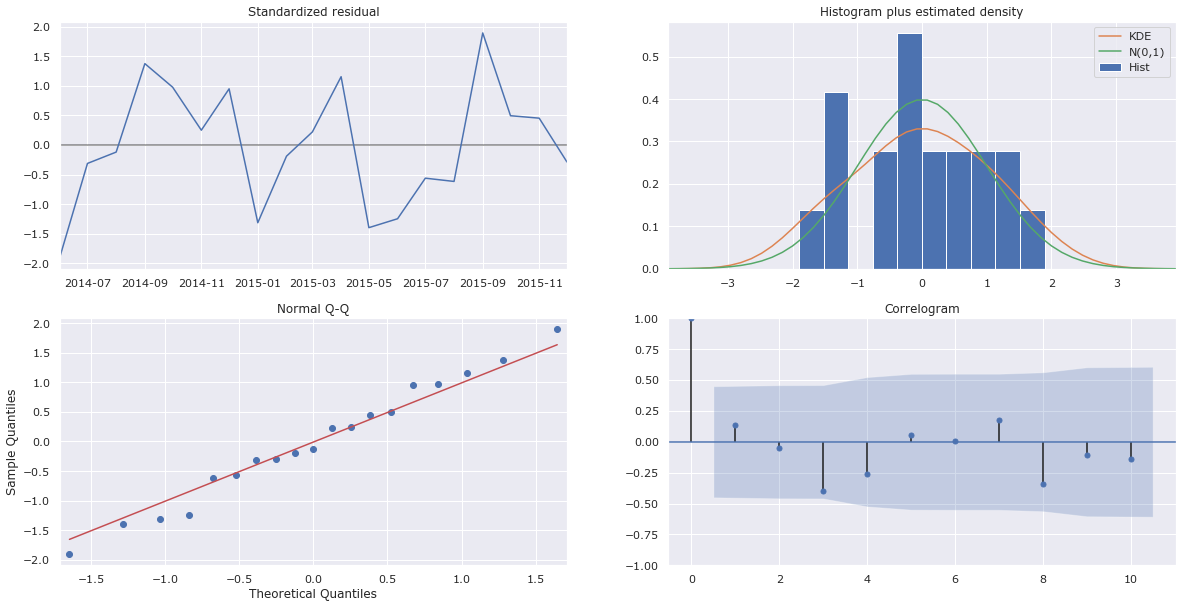

In [71]:
print("This model's AIC score is: ",fit.aic)
print("This model's BIC score is: ",fit.bic)
print("This model's RMSE on test data is: ",np.sqrt(fit.mse))
fit.plot_diagnostics(figsize=(20,10))

Lower AIC/BIC but slightly higher RMSE.

Now to use `auto_arima` to find the best params for final model.

In [74]:
# Searching for best params
model3 = auto_arima(master['2010':'2015'], trace=True, start_p=0, start_q=0,
                  start_P=0, start_Q=0, seasonal=True, m=52, suppress_warnings=True, 
                   D=1, error_action='ignore', approximation=False, random_state=42)
fitted = model3.fit(master['2010':'2015'], disp=0)

Performing stepwise search to minimize aic
Fit ARIMA(0,0,0)x(0,1,0,52) [intercept=True]; AIC=164.809, BIC=166.801, Time=0.124 seconds
Fit ARIMA(1,0,0)x(1,1,0,52) [intercept=True]; AIC=159.972, BIC=163.955, Time=10.791 seconds
Near non-invertible roots for order (1, 0, 0)(1, 1, 0, 52); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.997)
Fit ARIMA(0,0,1)x(0,1,1,52) [intercept=True]; AIC=160.072, BIC=164.055, Time=11.024 seconds
Near non-invertible roots for order (0, 0, 1)(0, 1, 1, 52); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.995)
Fit ARIMA(0,0,0)x(0,1,0,52) [intercept=False]; AIC=166.731, BIC=167.727, Time=0.165 seconds
Fit ARIMA(0,0,0)x(1,1,0,52) [intercept=True]; AIC=166.809, BIC=169.797, Time=0.978 seconds
Fit ARIMA(0,0,0)x(0,1,1,52) [intercept=True]; AIC=166.807, BIC=169.795, Time=6.010 seconds
Near non-invertible roots for order (0, 0, 0)(0, 1, 1, 52); setting score to inf (at least

{'maxiter': 50,
 'method': 'lbfgs',
 'order': (2, 0, 1),
 'out_of_sample_size': 0,
 'scoring': 'mse',
 'scoring_args': None,
 'seasonal_order': (0, 1, 0, 52),
 'start_params': None,
 'suppress_warnings': True,
 'trend': None,
 'with_intercept': True}

In [76]:
best_params = fitted.get_params()
print('\n\nThe best order parameters are {},{}\n'.format(best_params['order'],best_params['seasonal_order']))



The best order parameters are (2, 0, 1),(0, 1, 0, 52)



/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                                      SARIMAX Results                                      
Dep. Variable:                            interest   No. Observations:                   72
Model:             SARIMAX(2, 0, 1)x(0, 1, [], 52)   Log Likelihood                 -71.292
Date:                             Mon, 18 May 2020   AIC                            152.583
Time:                                     10:41:07   BIC                            157.562
Sample:                                 01-01-2010   HQIC                           153.555
                                      - 12-01-2015                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift         -0.0252      0.013     -1.999      0.046      -0.050      -0.000
ar.L1          1.4462      

Text(0.5, 1.0, 'SARIMA MODEL')

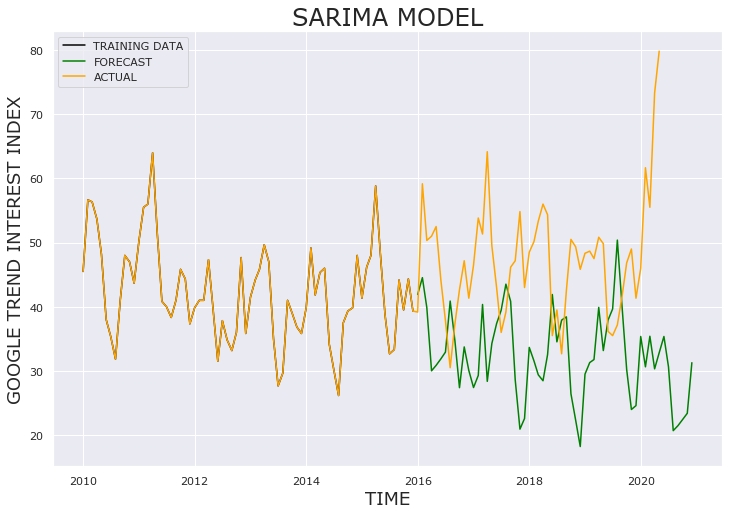

In [78]:
model4 = SARIMAX(master['2010':'2015'], order=(2,0,1), seasonal_order=(0, 1, 0, 52),
                trend='t')
fit = model4.fit()
print(fit.summary())
forecast = fit.forecast(60)
print('Forecasting 60 months into the future from the\ntraining data (2016-2021).\n...\n...')
forecast = pd.DataFrame(forecast)
forecast = rename_column(forecast, 0, 'forecast')
# Plot the nice graphs
fig,ax = plt.subplots(figsize=(12,8))
sns.lineplot(x=master['2010':'2015'].index,
             y=master['2010':'2015']['interest'], color='black')
sns.lineplot(x=forecast.index, y=forecast['forecast'], color='green')
sns.lineplot(x=master['2010':].index,
             y=master['2010':]['interest'], color='orange')
plt.legend(['TRAINING DATA', 'FORECAST', 'ACTUAL'], loc='best')
plt.xlabel('TIME',size=18)
plt.ylabel('GOOGLE TREND INTEREST INDEX', size=18)
plt.title(f'SARIMA MODEL', size=24)

How about RMSE?

This model's AIC score is:  152.58344051031642
This model's BIC score is:  157.56210187808637
This model's RMSE on test data is:  38.732385325902


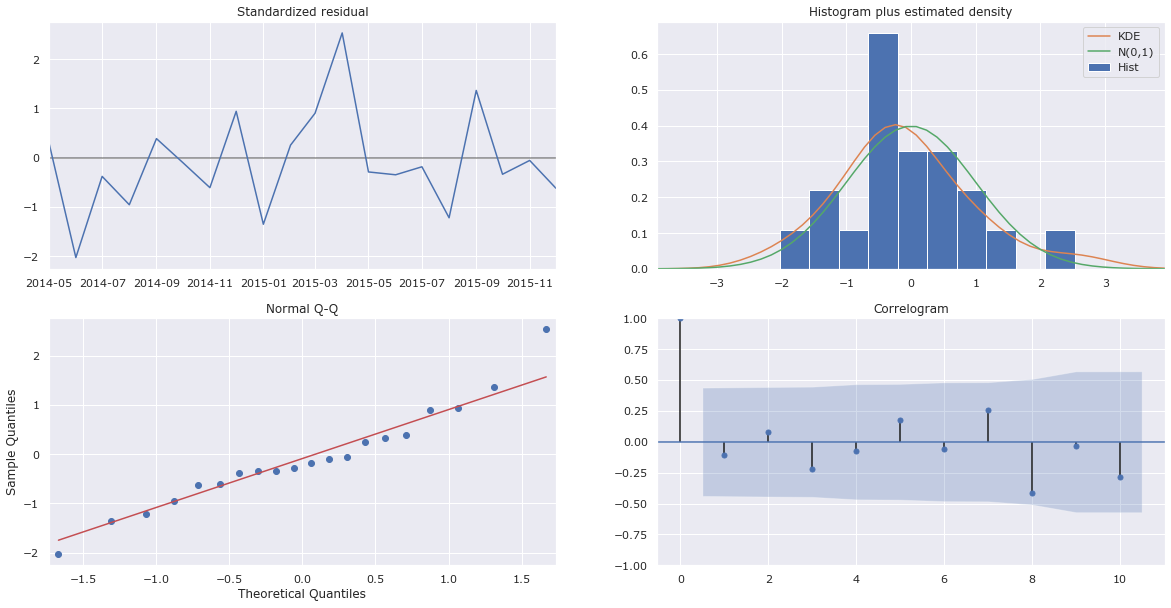

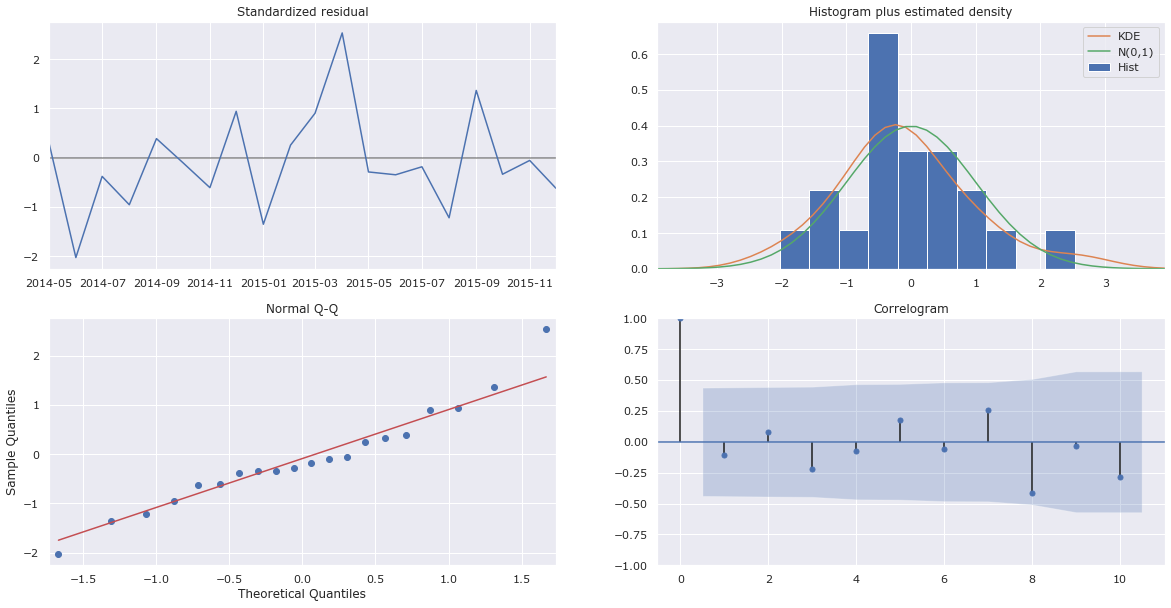

In [79]:
print("This model's AIC score is: ",fit.aic)
print("This model's BIC score is: ",fit.bic)
print("This model's RMSE on test data is: ",np.sqrt(fit.mse))
fit.plot_diagnostics(figsize=(20,10))

Although AIC is minimized compared to the other model, the BIC and RMSE is higher. It is less accurate, and in regards to the graphical forecast, doesn't follow the test data well.  
  
Going to re-initialize the `auto_arima` but this time with default ARMA parameters. I want to minimize AIC, but I also want to have an accurate model. Will try to balance.

In [80]:
model5 = auto_arima(master['2010':'2015'], trace=True, seasonal=True, m=52, suppress_warnings=True,
                    D=1, error_action='ignore', approximation=False, random_state=42)
fitted = model5.fit(master['2010':'2015'], disp=0)

Performing stepwise search to minimize aic
Fit ARIMA(2,0,2)x(1,1,1,52) [intercept=True]; AIC=161.424, BIC=169.389, Time=5.551 seconds
Fit ARIMA(0,0,0)x(0,1,0,52) [intercept=True]; AIC=164.809, BIC=166.801, Time=0.080 seconds
Fit ARIMA(1,0,0)x(1,1,0,52) [intercept=True]; AIC=159.972, BIC=163.955, Time=9.186 seconds
Near non-invertible roots for order (1, 0, 0)(1, 1, 0, 52); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.997)
Fit ARIMA(0,0,1)x(0,1,1,52) [intercept=True]; AIC=160.072, BIC=164.055, Time=9.644 seconds
Near non-invertible roots for order (0, 0, 1)(0, 1, 1, 52); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.995)
Fit ARIMA(0,0,0)x(0,1,0,52) [intercept=False]; AIC=166.731, BIC=167.727, Time=0.150 seconds
Fit ARIMA(2,0,2)x(0,1,1,52) [intercept=True]; AIC=159.423, BIC=166.394, Time=7.297 seconds
Fit ARIMA(2,0,2)x(0,1,0,52) [intercept=True]; AIC=157.424, BIC=163.398, Time=1.580 seconds
F

In [81]:
fitted.get_params()

{'maxiter': 50,
 'method': 'lbfgs',
 'order': (2, 0, 1),
 'out_of_sample_size': 0,
 'scoring': 'mse',
 'scoring_args': None,
 'seasonal_order': (0, 1, 0, 52),
 'start_params': None,
 'suppress_warnings': True,
 'trend': None,
 'with_intercept': True}

No difference. Going to initialize a starting d=1

In [82]:
model6 = auto_arima(master['2010':'2015'], trace=True, d=1, seasonal=True, m=52, suppress_warnings=True,
                    D=1, error_action='ignore', approximation=False, random_state=42)
fitted = model6.fit(master['2010':'2015'], disp=0)
fitted.get_params()

Performing stepwise search to minimize aic
Fit ARIMA(2,1,2)x(1,1,1,52) [intercept=True]; AIC=156.587, BIC=164.143, Time=18.651 seconds
Fit ARIMA(0,1,0)x(0,1,0,52) [intercept=True]; AIC=152.828, BIC=154.717, Time=0.153 seconds
Fit ARIMA(1,1,0)x(1,1,0,52) [intercept=True]; AIC=156.413, BIC=160.191, Time=11.197 seconds
Near non-invertible roots for order (1, 1, 0)(1, 1, 0, 52); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.996)
Fit ARIMA(0,1,1)x(0,1,1,52) [intercept=True]; AIC=156.415, BIC=160.192, Time=14.258 seconds
Near non-invertible roots for order (0, 1, 1)(0, 1, 1, 52); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.993)
Fit ARIMA(0,1,0)x(0,1,0,52) [intercept=False]; AIC=150.829, BIC=151.773, Time=0.368 seconds
Fit ARIMA(0,1,0)x(1,1,0,52) [intercept=True]; AIC=154.826, BIC=157.660, Time=10.379 seconds
Near non-invertible roots for order (0, 1, 0)(1, 1, 0, 52); setting score to inf (at lea

{'maxiter': 50,
 'method': 'lbfgs',
 'order': (0, 1, 0),
 'out_of_sample_size': 0,
 'scoring': 'mse',
 'scoring_args': None,
 'seasonal_order': (0, 1, 0, 52),
 'start_params': None,
 'suppress_warnings': True,
 'trend': None,
 'with_intercept': False}

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                                     SARIMAX Results                                      
Dep. Variable:                           interest   No. Observations:                   72
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 52)   Log Likelihood                 -74.413
Date:                            Mon, 18 May 2020   AIC                            152.826
Time:                                    11:22:14   BIC                            154.715
Sample:                                01-01-2010   HQIC                           153.146
                                     - 12-01-2015                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift          0.0023      0.045      0.051      0.959      -0.087       0.091
sigma2       147.6826     60.800   

Text(0.5, 1.0, 'SARIMA MODEL (0,1,0)x(0,1,0,52)')

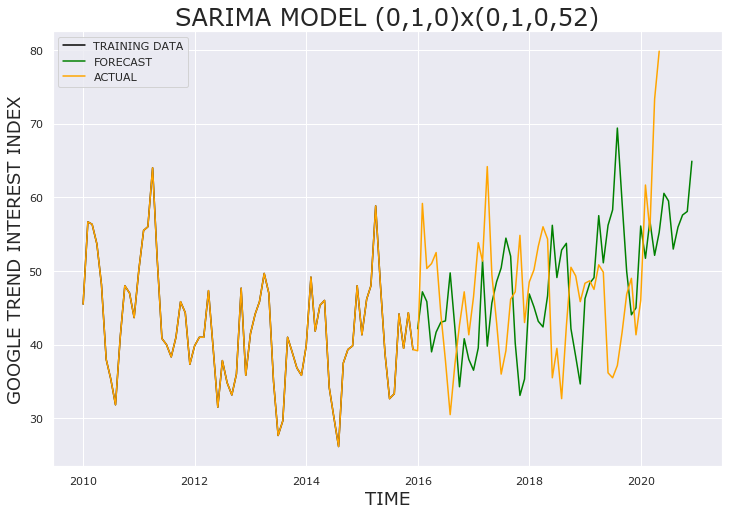

In [99]:
model7 = SARIMAX(master['2010':'2015'], order=(0,1,0), seasonal_order=(0, 1, 0, 52),
                trend='t')
fit = model7.fit()
print(fit.summary())
forecast = fit.forecast(60)
print('Forecasting 60 months into the future from the\ntraining data (2016-2021).\n...\n...')
forecast = pd.DataFrame(forecast)
forecast = rename_column(forecast, 0, 'forecast')
# Plot the nice graphs
fig,ax = plt.subplots(figsize=(12,8))
sns.lineplot(x=master['2010':'2015'].index,
             y=master['2010':'2015']['interest'], color='black')
sns.lineplot(x=forecast.index, y=forecast['forecast'], color='green')
sns.lineplot(x=master['2010':].index,
             y=master['2010':]['interest'], color='orange')
plt.legend(['TRAINING DATA', 'FORECAST','ACTUAL'], loc='best')
plt.xlabel('TIME',size=18)
plt.ylabel('GOOGLE TREND INTEREST INDEX', size=18)
plt.title(f'SARIMA MODEL (0,1,0)x(0,1,0,52)', size=24)

This model's AIC score is:  152.82585306898284
This model's BIC score is:  154.7147310273157
This model's RMSE on test data is:  10.11773472300625


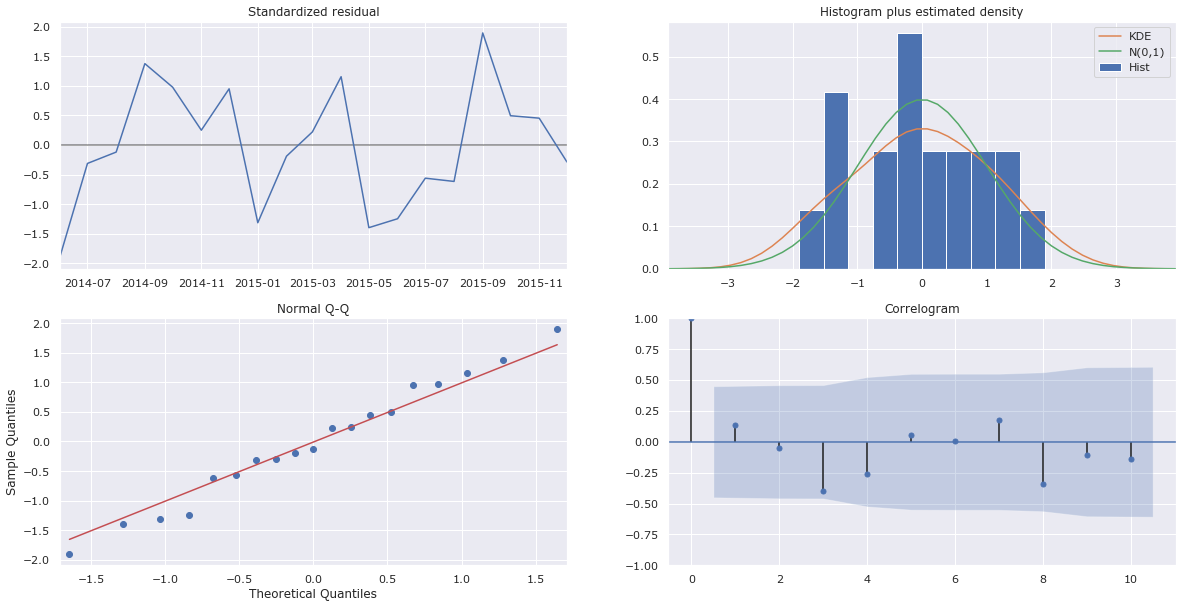

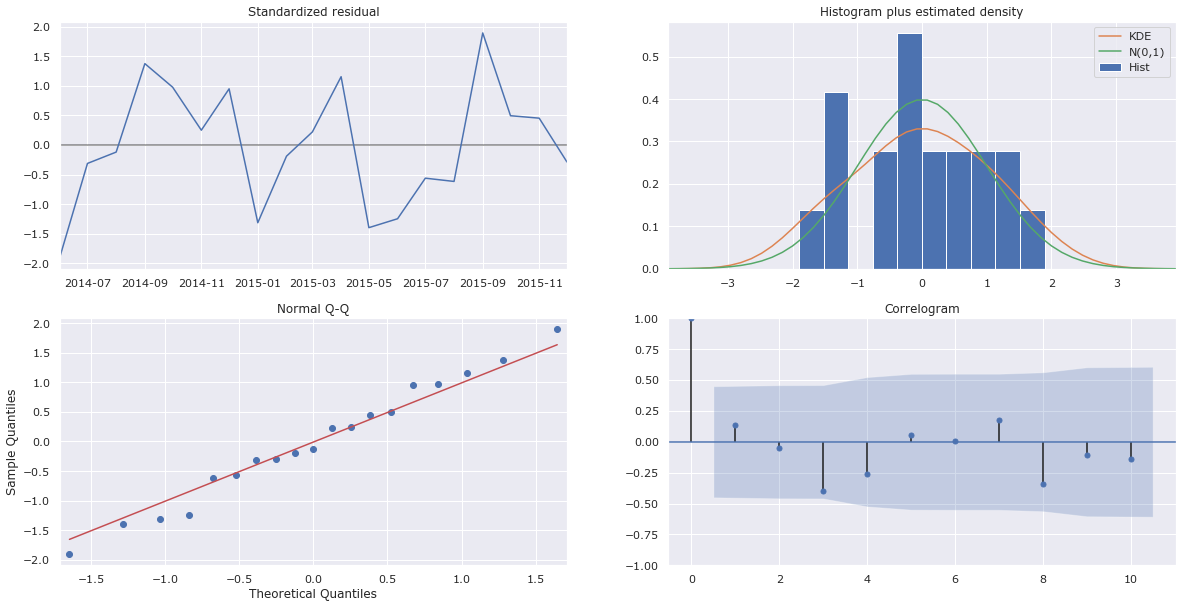

In [84]:
print("This model's AIC score is: ",fit.aic)
print("This model's BIC score is: ",fit.bic)
print("This model's RMSE on test data is: ",np.sqrt(fit.mse))
fit.plot_diagnostics(figsize=(20,10))

### Final model parameters (0,1,0)x(0,1,0,52)

Forecasting 108 months into the future from the
training data (2016-2025).
...
...


Text(0.5, 1.0, 'SARIMA MODEL PREDICTIONS THROUGH 2025')

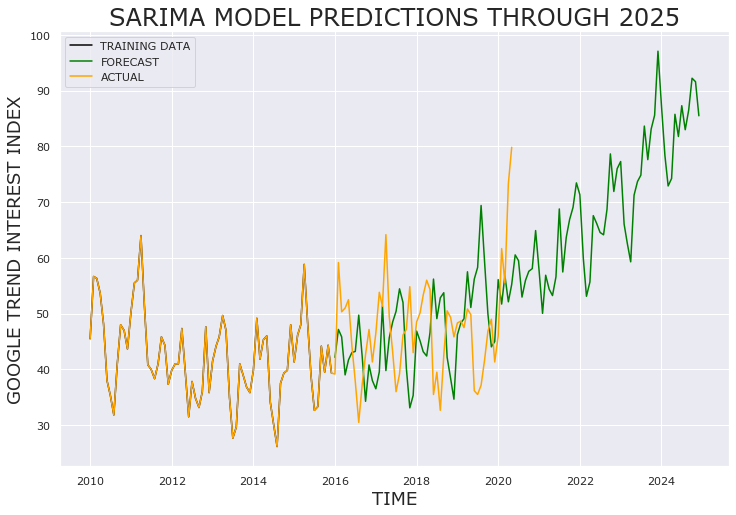

In [100]:
forecast = fit.forecast(108)
print('Forecasting 108 months into the future from the\ntraining data (2016-2025).\n...\n...')
forecast = pd.DataFrame(forecast)
forecast = rename_column(forecast, 0, 'forecast')
# Plot the nice graphs
fig,ax = plt.subplots(figsize=(12,8))
sns.lineplot(x=master['2010':'2015'].index,
             y=master['2010':'2015']['interest'], color='black')
sns.lineplot(x=forecast.index, y=forecast['forecast'], color='green')
sns.lineplot(x=master['2010':].index,
             y=master['2010':]['interest'], color='orange')
plt.legend(['TRAINING DATA', 'FORECAST', 'ACTUAL'], loc='best')
plt.xlabel('TIME',size=18)
plt.ylabel('GOOGLE TREND INTEREST INDEX', size=18)
plt.title(f'SARIMA MODEL PREDICTIONS THROUGH 2025', size=24)

---

---

# LSTM Modeling